<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/Growth_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# test_F =pd.read_excel('/content/drive/MyDrive/Bone_detection/data/GUI_APR/2017_성장도표_데이터테이블_공개용_최종.xlsx')
# test_F = test_F.rename(columns={'만나이(세)':'AGE','만나이(개월)':'MONTH','성별':'GENDER'})
# male_F = test_F[test_F['GENDER'] == 1]
# female_F = test_F[test_F['GENDER'] == 2]


# Test_male_year = male_F[male_F['AGE'] >=3]
# Test_female_year = female_F[female_F['AGE'] >=3]

# male_year = Test_male_year.drop(['GENDER','L','M','S','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD'],axis=1)
# male_year = male_year.set_index('AGE')

# female_year = Test_female_year.drop(['GENDER','L','M','S','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD'],axis=1)
# female_year = female_year.set_index('AGE')

# male_SD = Test_male_year[['AGE','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD']]
# male_SD = male_SD.set_index('AGE')

# female_SD = Test_female_year[['AGE','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD']]
# female_SD = female_SD.set_index('AGE')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def Height_prediction ( gender, BA, current_H ) :
    import pandas as pd
    lms_df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/height_df.csv')
    month_age = round(BA * 12)
    if gender == 1:
        lms_index = month_age - 36                                                             
        L_18, M_18, S_18 = lms_df.iloc[191,2], lms_df.iloc[191,3], lms_df.iloc[191,4]
    elif gender == 0:
        lms_index = month_age - 36
        L_18, M_18, S_18 = lms_df.iloc[383,2], lms_df.iloc[383,3], lms_df.iloc[383,4]

    L,M,S = lms_df.iloc[lms_index,2], lms_df.iloc[lms_index,3],lms_df.iloc[lms_index,4]
    x = current_H
    
    Z = (((x/M)**L)-1)/(L*S)
    Z = round(Z,4)

    pred_height = M_18 * (1 + (L_18 * S_18 * Z)) ** (1 / L_18)
    pred_height = round(pred_height, 1)
    return pred_height

In [ ]:
import pandas as pd
lms_df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/height_df.csv')
df_m = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/male_year.csv',index_col='AGE')
df_fm = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/female_year.csv',index_col='AGE')
graph_path = '/content/drive/MyDrive/Bone_detection/GGGGG/Sample.jpg'

In [ ]:
def find_th(df,BA,Height):
    df = df.reset_index()
    find_df = df[(df['AGE'] >= BA) & (df['MONTH'] >= BA*12 )] >= Height
    cdf = df[(df['AGE'] >= BA) & (df['MONTH'] >= BA*12 )]
    find_df = find_df.drop('MONTH',axis=1)
    find_df = find_df.iloc[0]
    find_df = find_df[find_df==True].index
    try:
        find_th = list(find_df)[0]

        if cdf.loc[(cdf.index[0]) , find_th] - 1.5 > Height :
            find_th = 'Abnormal'

        else:
            pass
    except:
        if cdf.loc[(cdf.index[0]) , '99th'] + 1.5 >= Height :
            find_th = '99th'
        else:
            find_th='Abnormal'

    return find_th

In [ ]:
df = df_m.reset_index()
df

,AGE,MONTH,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th
0,3.00,36,88.3,89.7,90.5,91.8,92.6,93.9,96.5,99.2,100.7,101.8,103.4,104.4,106.5
1,3.08,37,88.7,90.2,91.0,92.3,93.2,94.5,97.0,99.8,101.3,102.3,103.9,105.0,107.1
2,3.17,38,89.2,90.7,91.5,92.8,93.7,95.0,97.6,100.3,101.8,102.9,104.5,105.6,107.6
3,3.25,39,89.7,91.2,92.0,93.3,94.2,95.5,98.1,100.9,102.4,103.5,105.1,106.1,108.2
4,3.33,40,90.2,91.7,92.5,93.8,94.7,96.1,98.7,101.4,103.0,104.0,105.6,106.7,108.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,18.58,223,161.7,164.0,165.2,167.2,168.5,170.4,174.2,177.9,180.0,181.4,183.6,184.9,187.6
188,18.67,224,161.8,164.1,165.3,167.3,168.6,170.5,174.2,178.0,180.1,181.5,183.7,185.0,187.7
189,18.75,225,161.9,164.2,165.4,167.3,168.6,170.6,174.3,178.1,180.2,181.6,183.7,185.1,187.8
190,18.83,226,162.0,164.3,165.5,167.4,168.7,170.7,174.4,178.2,180.3,181.7,183.8,185.2,187.9


In [ ]:
def Height_graph(gender, Predict_BA, current_Height):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10,15))
    box={'facecolor':'w','edgecolor':'k','boxstyle':'round','alpha':1}
    ## 성별에 따른 DF 변환

    if gender == 1:
        df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/male_year.csv',index_col='AGE')
        sns.lineplot(data=df[['1st','3rd','5th','10th','25th','50th','75th','90th','95th','97th','99th']],palette='PuBu',dashes=False)
    elif gender == 0:
        df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/female_year.csv',index_col='AGE')
        sns.lineplot(data=df[['1st','3rd','5th','10th','25th','50th','75th','90th','95th','97th','99th']],palette='Reds',dashes=False)
    
    ## 위치하고 있는 분위수 판단
    result_th = find_th(df,Predict_BA,current_Height)

    ## 18세 예상 키 예측
    Predict_Height = Height_prediction(gender,Predict_BA,current_Height)

    ## x,y 축 라벨링
    plt.xlabel('Age')
    plt.ylabel('Height')

    # 현재 나이 (예측 골연령값) + 현재 신장
    plt.axvline(Predict_BA,color='k',linestyle='--')
    plt.axhline(current_Height,color='k',linestyle='--')

    ## 분위수 해냈다 2시간
    plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , {result_th} ]'), alpha=1, color='k',fontsize=15)

    ## 18세 나이 + 예측 신장
    plt.axvline(18,color='r',linestyle='--')
    plt.axhline(Predict_Height,color='r',linestyle='--')


    ## 성별별 Annotation
    if gender ==1 :
        plt.text(x=13, y=Predict_Height+5, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)
    elif gender == 0 :
        plt.text(x=13, y=175, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15)


        ## 라인 주석처리
        if gender == 1 :
            plt.text(x=19,y=188.0,s='99th',alpha=1,color='#2e6c92',fontsize=10) #99
            plt.text(x=19,y=185.3,s='97th',alpha=1,color='#276b93',fontsize=10) #97
            plt.text(x=19,y=183.9,s='95th',alpha=1,color='#438cb9',fontsize=10) #95
            plt.text(x=19,y=181.8,s='90th',alpha=1,color='#519cc8',fontsize=10) #90
            plt.text(x=19,y=178.3,s='75th',alpha=1,color='#71afd1',fontsize=10) #75
            plt.text(x=19,y=174.5,s='50th',alpha=1,color='#95beda',fontsize=10) #50
            plt.text(x=19,y=170.8,s='25th',alpha=1,color='#b4cae2',fontsize=10) #25
            plt.text(x=19,y=167.5,s='10th',alpha=1,color='#cfd6e9',fontsize=10) #10
            plt.text(x=19,y=165.6,s='5th',alpha=1,color='#e3e3ef',fontsize=10) #5
            plt.text(x=19,y=164.4,s='3rd',alpha=1,color='#f3eff6',fontsize=10) #3
            plt.text(x=19,y=162.1,s='1st',alpha=1,color='#f7f3f9',fontsize=10) #1


        if gender == 0 :
            plt.text(x=19,y=173.2,s='99th',alpha=1,color='#a5383f',fontsize=10) #99
            plt.text(x=19,y=170.8,s='97th',alpha=1,color='#b1484d',fontsize=10) #97
            plt.text(x=19,y=169.5,s='95th',alpha=1,color='#cc4e53',fontsize=10) #95
            plt.text(x=19,y=167.6,s='90th',alpha=1,color='#c84a4e',fontsize=10) #90
            plt.text(x=19,y=164.4,s='75th',alpha=1,color='#f47265',fontsize=10) #75
            plt.text(x=19,y=161.1,s='50th',alpha=1,color='#fb8e77',fontsize=10) #50
            plt.text(x=19,y=157.8,s='25th',alpha=1,color='#fca78f',fontsize=10) #25
            plt.text(x=19,y=154.9,s='10th',alpha=1,color='#fcbfaa',fontsize=10) #10
            plt.text(x=19,y=153.2,s='5th',alpha=1,color='#fddbcd',fontsize=10) #5
            plt.text(x=19,y=152.2,s='3rd',alpha=1,color='#feebe1',fontsize=10) #3
            plt.text(x=19,y=150.2,s='1st',alpha=1,color='#fee8df',fontsize=10) #1     


    ## 범례 위치 적용
    plt.legend(loc='upper left')
    plt.grid(linestyle='--',color='k',linewidth=0.5,)
    plt.xticks(ticks=range(3,19))
    plt.yticks(ticks=range(80,201,10))
    plt.title('3-18 Age & Height')

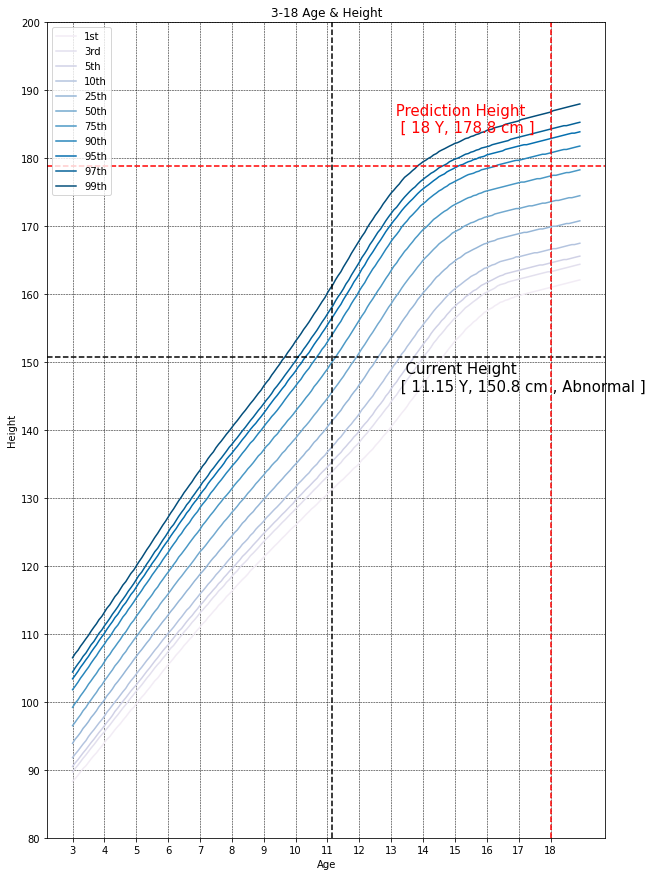

In [ ]:
# def Height_graph(gender, Predict_BA, current_Height):
Height_graph(1,11.15,150.8)

In [ ]:
find_th(df_m,11.15,150.8)

AGE      False
MONTH    False
1st      False
3rd      False
5th      False
10th     False
15th     False
25th     False
50th     False
75th     False
85th      True
90th      True
95th      True
97th      True
99th      True
Name: 98, dtype: bool


In [ ]:
# 그래프 출력 함수

# lms_df : height_df.csv
# lms_df = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/height_df.csv')

def Height_prediction ( gender, BA, current_H, lms_df) :
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    
    month_age = round(BA * 12)
    if gender == 1:
        lms_index = month_age - 36                                                             
        L_18, M_18, S_18 = lms_df.iloc[191,2], lms_df.iloc[191,3], lms_df.iloc[191,4]
    elif gender == 0:
        lms_index = month_age - 36
        L_18, M_18, S_18 = lms_df.iloc[383,2], lms_df.iloc[383,3], lms_df.iloc[383,4]

    L,M,S = lms_df.iloc[lms_index,2], lms_df.iloc[lms_index,3],lms_df.iloc[lms_index,4]
    x = current_H
    
    Z = (((x/M)**L)-1)/(L*S)
    Z = round(Z,4)

    pred_height = M_18 * (1 + (L_18 * S_18 * Z)) ** (1 / L_18)
    pred_height = round(pred_height, 1)
    return pred_height

def find_th(df,BA,Height):
    try:
        df = df.reset_index()
        find_df = df[(df['AGE'] >= BA) & (df['MONTH'] >= int(BA*12) )] >= Height
        find_df = find_df.iloc[0]
    except:
        print('Abnormal growth. Please check again')

# df_m = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/male_year.csv',index_col='AGE')
# df_fm = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/growth/female_year.csv',index_col='AGE')
def Height_graph(gender, Predict_BA, current_Height, df_m, df_fm, lms_df, graph_path):
    import pandas as pd
    import matplotlib
    matplotlib.use('Qt5Agg')
    import matplotlib.pyplot as plt
    import seaborn as sns
    import cv2
    from datetime import datetime
    now = datetime.now()
    formattedDate = now.strftime("%Y%m%d_%H%M%S")
    # filename = formattedDate+'jpg'
    # graph_path
    
    try:
        plt.figure(figsize=(10,15))  
        
        box={'facecolor':'w','edgecolor':'k','boxstyle':'round','alpha':1}
        
        if gender == 1:
            df = df_m.copy()
            sns.lineplot(data=df[['1st','3rd','5th','10th','25th','50th','75th','90th','95th','97th','99th']],palette='PuBu',dashes=False)
        elif gender == 0:
            df = df_fm.copy()
            sns.lineplot(data=df[['1st','3rd','5th','10th','25th','50th','75th','90th','95th','97th','99th']],palette='Reds',dashes=False)
        
        ## 위치하고 있는 분위수 판단
        result_th = find_th(df,Predict_BA,current_Height)

        ## 18세 예상 키 예측
        Predict_Height = Height_prediction(gender,Predict_BA,current_Height, lms_df)

        ## x,y 축 라벨링
        plt.xlabel('Age', fontsize=15)
        plt.ylabel('Height', fontsize=15)

        # 현재 나이 (예측 골연령값) + 현재 신장
        plt.axvline(Predict_BA,color='k',linestyle='--')
        plt.axhline(current_Height,color='k',linestyle='--')

        ## 현재위치 
        plt.plot(Predict_BA, current_Height, marker="o", markersize=10,color="k")
        
        ## 분위수 오류해결

        if result_th == 'MONTH':
            result_th = 'Abnormal'
            plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , Abnormal ]'), alpha=1, color='k',fontsize=15,bbox=box)

        elif result_th == None :
            result_th = 'Abnormal'
            plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , Abnormal ]'), alpha=1, color='k',fontsize=15,bbox=box)

        elif result_th != None :
            plt.text(x=Predict_BA+2, y=current_Height-5, s=(f'  Current Height  \n [ {Predict_BA} Y, {current_Height} cm , {result_th} ]'), alpha=1, color='k',fontsize=15,bbox=box)

        ## 18세 나이 + 예측 신장
        plt.axvline(18,color='r',linestyle='--')
        plt.axhline(Predict_Height,color='r',linestyle='--')

        ## 예상위치 
        plt.plot(18, Predict_Height, marker="o", markersize=10, color="r")
        
        ## 성별별 Annotation
        if gender ==1 :
            plt.text(x=13, y=Predict_Height+5, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15,bbox=box)
        elif gender == 0 :
            plt.text(x=13, y=175, s=(f' Prediction Height  \n  [ 18 Y, {Predict_Height} cm ]'), alpha=1, color='r',fontsize=15,bbox=box)

        ## 라인 주석처리
        if gender == 1 :
            plt.text(x=19,y=188.0,s='99th',alpha=1,color='#2e6c92',fontsize=10) #99
            plt.text(x=19,y=185.3,s='97th',alpha=1,color='#276b93',fontsize=10) #97
            plt.text(x=19,y=183.9,s='95th',alpha=1,color='#438cb9',fontsize=10) #95
            plt.text(x=19,y=181.8,s='90th',alpha=1,color='#519cc8',fontsize=10) #90
            plt.text(x=19,y=178.3,s='75th',alpha=1,color='#71afd1',fontsize=10) #75
            plt.text(x=19,y=174.5,s='50th',alpha=1,color='#95beda',fontsize=10) #50
            plt.text(x=19,y=170.8,s='25th',alpha=1,color='#b4cae2',fontsize=10) #25
            plt.text(x=19,y=167.5,s='10th',alpha=1,color='#cfd6e9',fontsize=10) #10
            plt.text(x=19,y=165.6,s='5th',alpha=1,color='#e3e3ef',fontsize=10) #5
            plt.text(x=19,y=164.4,s='3rd',alpha=1,color='#f3eff6',fontsize=10) #3
            plt.text(x=19,y=162.1,s='1st',alpha=1,color='#f7f3f9',fontsize=10) #1


        if gender == 0 :
            plt.text(x=19,y=173.2,s='99th',alpha=1,color='#a5383f',fontsize=10) #99
            plt.text(x=19,y=170.8,s='97th',alpha=1,color='#b1484d',fontsize=10) #97
            plt.text(x=19,y=169.5,s='95th',alpha=1,color='#cc4e53',fontsize=10) #95
            plt.text(x=19,y=167.6,s='90th',alpha=1,color='#c84a4e',fontsize=10) #90
            plt.text(x=19,y=164.4,s='75th',alpha=1,color='#f47265',fontsize=10) #75
            plt.text(x=19,y=161.1,s='50th',alpha=1,color='#fb8e77',fontsize=10) #50
            plt.text(x=19,y=157.8,s='25th',alpha=1,color='#fca78f',fontsize=10) #25
            plt.text(x=19,y=154.9,s='10th',alpha=1,color='#fcbfaa',fontsize=10) #10
            plt.text(x=19,y=153.2,s='5th',alpha=1,color='#fddbcd',fontsize=10) #5
            plt.text(x=19,y=152.2,s='3rd',alpha=1,color='#feebe1',fontsize=10) #3
            plt.text(x=19,y=150.2,s='1st',alpha=1,color='#fee8df',fontsize=10) #1    
        


        ## 범례 위치 적용
        plt.legend(loc='upper left')
        plt.grid(linestyle='--',color='k',linewidth=0.5,)
        plt.xticks(ticks=range(3,19))
        plt.yticks(ticks=range(80,201,10))
        plt.title('3-18 Age & Height', fontsize=15)
        plt.savefig(graph_path,bbox_inches='tight')

    except Exception as e :
        print(e)
       
        

    return result_th, Predict_Height

In [ ]:
gender = 1
Predict_BA = 11.15
current_Height = 150.8

In [ ]:
Height_graph(gender, Predict_BA, current_Height, df_m, df_fm, lms_df, graph_path)

ImportError: ignored